# 1. Optimization problem

## 1.1. Problem statement
Optimization is the problem of finding minimum or maximum of a function.

## 1.2. First-derivative test

## 1.3. Second-derivative test

# 2. Gradient Descent
In real life, especially when the gradient gets very complicated or is very large, mathematical methods on solving for global minimum are shown to be impossible. There are a number of computational methods have been developed in order to find extrema of a function, where [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) (GD) is one of the most pupular and is widely used in Machine Learning. This is an iterative method trying to minimize a [differentiable](https://en.wikipedia.org/wiki/Differentiable_function) function; in the context of Machine Learning, the function to be minimized is nothing but the loss function, $L(\mathbf{w})$, where $\mathbf{w}$ represents model parameters. The gradient of this function is denoted $\mathbf{g}=g(\mathbf{w})=\nabla L(\mathbf{w})$.

There is a drawback of GD is that it is designed to find a local minimum, while we need the global minimum of the loss function. A lot of works have been proposed to tackle this problem, described in a evolutionary chart as below.

<img src='image/gradient_descent_evolutionary.png' style='height:350px; margin:20px auto 20px;'>

## 2.1. BGD
This section is about the most basic idea of the family, Batch/Vanilla Gradient Descent (BGD).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Analysis of derivative
To understand the smart idea behind Gradient Descent, we first analyze the relative position between a random point to its *closest* local minimum. We have already known derivarive at a point is the representation of *instantaneous velocity*, but how about its direction? To illustrate this, let's plot the derivatives at some points of a 1-dimensional function as vectors along the $x$-axis.

$$y=\frac{1}{128}(x^4-8x^3)$$

<img src='output/directional_derivative.png' style='height:300px; margin:0px auto 20px;'>

In this function, there are two [critical points](<https://en.wikipedia.org/wiki/Critical_point_(mathematics)>) at $x=0$ and $x=6$, in which the first one is a [saddle point](https://en.wikipedia.org/wiki/Saddle_point) and the second one is a [local minimum](https://en.wikipedia.org/wiki/Maxima_and_minima). A very important conclusion can be drawn from this graph is that directional derivatives always *point away* from the steepest path downwards. In other words, if we move the point in the *opposite direction* of the derivative, we will end up approach a local minimum or a saddle point. Unfortunately, from the perspective of a single point on the graph and using only gradient, there is no way to regconize if there comes a saddle point.

In [28]:
func = lambda x: 1/128 * (x**4 - 8*x**3)
grad = lambda x: 1/32 * (x**3 - 6*x**2)

left, right = -4, 10
xData = np.linspace(left, right, 1000)
yData = func(xData)

xCritical = np.array([0, 6])
yCritical = func(xCritical)

xRed = np.array([-2])
yRed = func(xRed)
uRed = grad(xRed)
vRed = np.zeros(xRed.shape)

xBlue = np.array([3, 4, 7])
yBlue = func(xBlue)
uBlue = grad(xBlue)
vBlue = np.zeros(xBlue.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(xData, yData, '-', c='grey')
ax.plot(xCritical, yCritical, 'o', c='grey')
ax.plot(xRed, yRed, 'o', c='indianred')
ax.quiver(xRed, yRed, uRed, vRed, color='indianred', units='xy', scale=1/2)
ax.plot(xBlue, yBlue, 'o', c='cornflowerblue')
ax.quiver(xBlue, yBlue, uBlue, vBlue, color='cornflowerblue', units='xy', scale=1/2)
ax.set_xlim(left, right)
fig.savefig('output/directional_derivative.png', dpi=500, bbox_inches='tight')
plt.close(fig)

### Algorithm
From the above analyses, an iterative method call Gradient Descent has been proposed to find local minima. This algorithm initializes an arbitrary point and update its position at each iteration $t$ using the formula:

$$\begin{aligned}
\Delta w_t &= -\eta g_t \\
w_{t+1} &= w_t+\Delta w_t
\end{aligned}$$

Using this design, the (magnitude of) the gradient gets smaller and smaller and finally approach 0, thus the name of the algorithm. The whole process can be thought as a ball rolling down the hill. There is a coefficient named the *learning rate* (denoted $\eta$) attached to the gradient, controls how large each step is. The value of this hyperparameter should not be either too large (making the convergence not happening) or too small (taking too long to converge). The effect of learning rate is illustrated in the following example, in which we build the algorithm from scratch to find the minimum of the function $y=x^2+5\sin(x)$ for different values of $\eta$.

<img src='output/batch_gradient_descent.gif' style='height:250px; margin:20px auto 20px;'>

The updating process can also be summarized as [learning curves](<https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)>).

<img src='output/batch_gradient_descent.png' style='height:300px; margin:20px auto 20px;'>

A couple of stopping conditions are also used such as tolerance (maximum magnitude of gradient) or maximum number of iterations. In the example, I use 50 iterations and set the value of tolerance to 0 to make sure all iterations are used.

Finally, the Gradient Descent's formula is sometimes simplified by removing the indices of iterations:

$$w\leftarrow w-\eta g$$

In [21]:
def BatchGD(func, grad, eta, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [3]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 30
xInit = 5

eta1 = 0.4
eta2 = 0.1
eta3 = 0.06

frames1 = BatchGD(func, grad, eta1, nIter, xInit)
frames2 = BatchGD(func, grad, eta2, nIter, xInit)
frames3 = BatchGD(func, grad, eta3, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2, frames3]

xLeft, xRight = -3, 5

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2, x3, y3 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'learningRate={eta1}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'learningRate={eta2}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'learningRate={eta3}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/batch_gradient_descent.gif'
gif.save(path, dpi=300, writer=PillowWriter())

In [30]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('iteration')
    ax.set_ylabel('value')
    plt.show()

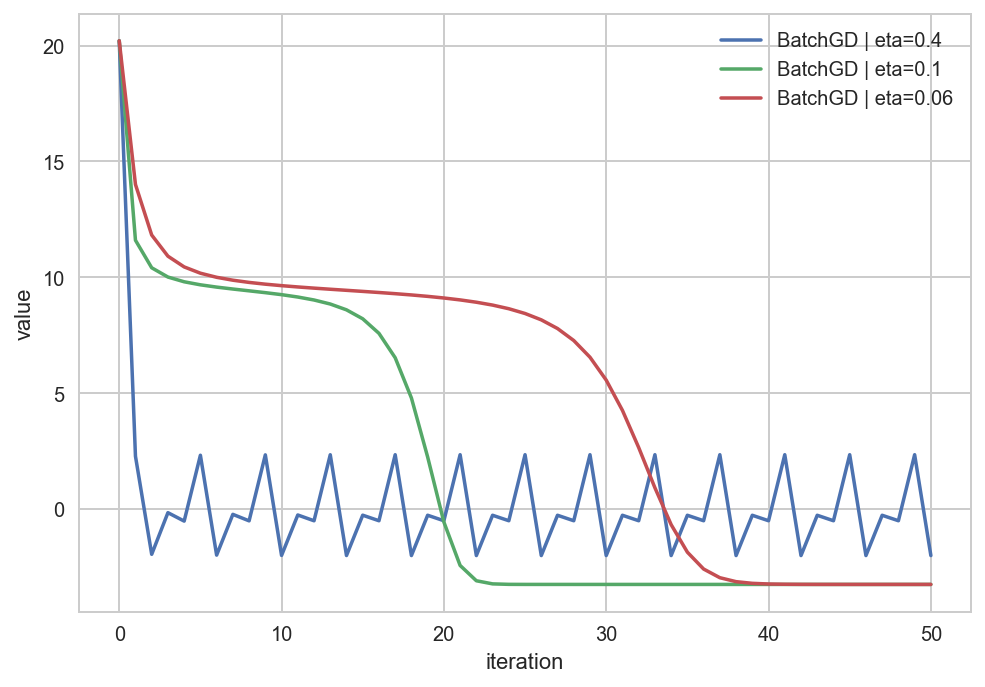

In [36]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

listAlgo = [
    BatchGD(func, grad, eta=0.4, nIter=50, xInit=5),
    BatchGD(func, grad, eta=0.1, nIter=50, xInit=5),
    BatchGD(func, grad, eta=0.06, nIter=50, xInit=5),
]

listLabel = [
    'BatchGD | eta=0.4',
    'BatchGD | eta=0.1',
    'BatchGD | eta=0.06',
]

compare_gd(listAlgo, listLabel)

In [30]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 50
xInit = 5
etaList = [0.4, 0.1, 0.06]

fig, ax = plt.subplots()
for eta in etaList:
    xList, yList = BatchGD(func, grad, eta, nIter, xInit).T
    iList = np.arange(nIter+1)
    ax.plot(iList, yList, label=f'eta={eta}')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('value')

fig.savefig('output/batch_gradient_descent.png', dpi=500, bbox_inches='tight')
plt.close(fig)

## 2.2. SGD
In this section, we talk about some drawbacks of BGD in practice: (1) its heavy dependence on the intial point, (2) the capability of online learning, (3) the memory cost and how [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) comes to the rescue.

### Stochastic behaviour
This Gradient Descent's variant only considers a part of data (mini-batch, or batch for short) instead of the whole dataset (full-batch) in each iteration to compute the gradient. The term *stochastic* means we add something *random*, *non-deterministic* into the algorithm. At first glance, a common sense is that using a part of data is less accurate, but it turns out SGD is amazingly efficient in practice. Let's analyze the advantages of SGD over BGD.
- SGD makes data in each iteration small enough so that it can be loaded into RAM with ease, this also reduces the computation cost significantly.
- Randomness in SGD works as a regularization mechanic, some sort of trade-off between exploration and exploitation. In short-term, noisy steps can lead the ball away from local minima or saddle points; while in long-term, the ball still tends to finish in a valley bottom. For BGD, the ball goes straight to the local minimum; this behaviour is deterministic and thus has no exploration.
- SGD enables *online learning*, which is a very important feature when implementing in practice. When there are new data, SGD treats them as a number of batches and updates to the current model easily, without re-computing gradients for the entire dataset.

As steps in SGD are very noisy, we need to update more frequently than BGD to reach *long-term* state. This leads to the idea of using more than one epoch (an epoch is a pass over all data samples), which will be described in the next part. Nowadays, the SGD algorithm using the epoch concept is implemented in many modern ML/DL frameworks. Later improved techniques are also developed based on this implementation; however, I still use BGD to make things as simple as possible.

### Algorithm
*Input*
- A dataset $\mathcal{D}$ having $N$ samples
- A loss function $L(\mathbf{w})$ and its gradient $\nabla{L}$
- A learning rate, $\eta$
- A batch size, $B$
- A number of epochs, $E$

*Step 1*. Calculate the number of batches $T=\lceil N/B\rceil$.

*Step 2*. Initialize model parameters $\mathbf{w}$ randomly.

*Step 3*. For $e=1,2,\dots,E$:
- Shuffle the training set $\mathcal{D}$ to renew batches.
- Divide $\mathcal{D}$ into $T$ batches, denoted $\mathcal{B}_1,\mathcal{B}_2,\dots,\mathcal{B}_T$. Each batch has the size of $B$ and the last batch may have less than $B$ samples.
- For $t=1,2,\dots,T$:
    - Compute the gradient $\nabla{L(\mathbf{w})}$ for batch $\mathcal{B}_t$
    - Compute the step size by multiplying the learning rate and the gradient
    - Update the position using the rule: $\mathbf{w}\leftarrow\mathbf{w}-\eta\,\nabla{L(\mathbf{w})}$

## 2.3. Momentum
As far as we know, GD works as a ball rolling down the hill and stops in a valley bottom. However, our ball will stuck in local minima most of the time, then we need some [acceleration](https://en.wikipedia.org/wiki/Acceleration) to helps it cross these traps. A Momentum term has been introduced to extend the GD's update rule as follow:

$$\begin{aligned}
\Delta w_t &= -\eta g_t+\gamma \Delta w_{t-1} \\
w_{t+1} &= w_t+\Delta w_t
\end{aligned}$$

In each step, the ball not only moves downwards as normal GD, but also accumulates [momentum](https://en.wikipedia.org/wiki/Momentum) from all previous steps:

$$\Delta w_T=-\eta\sum_{t=1}^{T}{\gamma^t g_{T-t}}$$

The amount of information memorized from the previous step is controled by a coefficient, $\gamma$. The value of this hyperparameter is set $0<\gamma<1$, typically $0.9$, forcing earlier steps to have less effect. Visually, the motion of the ball is now more realistic, as it seems to carry [inertia](https://en.wikipedia.org/wiki/Inertia).

<img src='output/momentum_gradient_descent.gif' style='height:250px; margin:20px auto 20px;'>

The benefits of using Momentum includes:
- Momentum can help escaping local minima and saddle points
- Momentum accelerates the ball so that it moves faster towards the minima
- When implemented in SGD, Momentum dampens the *oscillations*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [6]:
def BatchGD(func, grad, eta, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

def MomentumGD(func, grad, eta, gamma, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xDelta = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = gamma * xDelta - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [7]:
func = lambda x: 1/12 * (3*x**4 - 16*x**3 + 18*x**2)
grad = lambda x: x**3 - 4*x**2 + 3*x

nIter = 50
xInit = -1.5
eta = 0.08
gamma = 0.8

frames1 = BatchGD(func, grad, eta, nIter, xInit)
frames2 = MomentumGD(func, grad, eta, gamma, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2]

xLeft, xRight = -2, 4

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'learningRate={eta}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'learningRate={eta}, momentum={gamma}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/momentum_gradient_descent.gif'
gif.save(path, dpi=300, writer=PillowWriter())

## 2.4. Nesterov

## 2.5. AdaGrad

The optimizers above remain one learning rate constant through training while AdaGrad adapts learning rate to the parameters, performing low learning rates for parameters associated with frequently features, and higher learning rates for parameters associated with infrequent features. AdaGrad suitables for dealing with sparse data, the learning rate will be updated after each iteration.

$$\begin{aligned}
\eta_t &= \frac{\eta}{\sqrt{g_{t}^2+g_{t-1}^2+\dots+\epsilon}} \\
\Delta w_t &= -\eta_t g_t \\
w_{t+1} &= w_t+\Delta w_t
\end{aligned}$$

The new learning rate $\eta_{t+1}$ will be affected by accumulate gradient of all previous step so that it will get smaller after each interations and can lead to slow convergence, so the initiation value of learning rate should be high, typically $\eta=1.0$ (the $\epsilon$ is very small positive which added to prevent divide by zero error)

<img src='output/adagrad.gif' style='height:250px; margin:20px auto 20px;'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [2]:
def AdaGrad(func, grad, eta, eps, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    gradInit = grad(x)
    xList, yList, gradList = np.array(x), np.array(y), np.array(gradInit)
    
    for i in range(nIter):
        etaAdj = eta / np.sqrt(np.sum(gradList**2) + eps)
        xDelta = - etaAdj * grad(x)
        x = x + xDelta
        y = func(x)
        gradList = np.append(gradList,grad(x))
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [3]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 50
xInit = 5

eta1 = .1
eta2 = .8
eta3 = 1.0
eps = 1e-8

frames1 = AdaGrad(func, grad, eta1, eps, nIter, xInit)
frames2 = AdaGrad(func, grad, eta2, eps, nIter, xInit)
frames3 = AdaGrad(func, grad, eta3, eps, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2, frames3]

xLeft, xRight = -3, 5

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2, x3, y3 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'learningRate={eta1}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'learningRate={eta2}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'learningRate={eta3}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/ada_gradient_descent.gif'
gif.save(path, dpi=300, writer=PillowWriter())

## 2.6. RMSprop

RMSprop and AdaDelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates. The difference between RMSprop and AdaDelta is RMSprop still need learning rate at first of the training.

$$\begin{aligned}
\text{E}[g^2]_t &= \gamma \text{E}[g^2]_{t-1}+(1-\gamma)g_t^2 \\
\eta_t &= \frac{\eta}{\sqrt{\text{E}[g^2]_t+\epsilon}} \\
\Delta w_t &= -\eta_t g_t \\
w_{t+1} &= w_t+\Delta w_t
\end{aligned}$$

<img src='output/rmsprop.gif' style='height:250px; margin:20px auto 20px;'>

As same as AdaDelta, we should choose $\gamma$ between 0.9 and 0.98, the learning rate should be high in range 0.1 to 0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [2]:
def RMSprop(func, grad, eta, eps, gamma, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    exp = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        exp = gamma * exp + (1-gamma) * grad(x)**2
        etaAdj = eta / np.sqrt(exp + eps)
        xDelta = - etaAdj * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [3]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 65
xInit = 5

eta = .1
eps = 1e-8
gamma1 = .5
gamma2 = .9
gamma3 = .98

In [4]:
frames1 = RMSprop(func, grad, eta, gamma1, eps, nIter, xInit)
frames2 = RMSprop(func, grad, eta, gamma2, eps, nIter, xInit)
frames3 = RMSprop(func, grad, eta, gamma3, eps, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2, frames3]

xLeft, xRight = -3, 5

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2, x3, y3 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 20)
    ax1.set_title(f'gamma={gamma1}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'gamma={gamma2}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'gamma={gamma3}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/rmsprop.gif'
gif.save(path, dpi=300, writer=PillowWriter())

## 2.7. AdaDelta

AdaDelta is the update version of AdaGrad which try to solve the radically diminishing learning rates problem. The main idea is instead of summing all squared gradient up to $t$, the algorithm take accumulate the sum of squared gradients over a restricted time window. This can be archived by using [Exponentially Weighted Moving Averages](https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average). Secondly, instead of using init learning rate, AdaDelta using sum squared of $\Delta\mathbf{w}$ in order to correct the unit of function result to the parameter. Call $\mathbf{RMS_{\Delta\mathbf{w_{t-1}}}}$ is *EWMA of squared delta* (also called *Root mean squared*) and $\mathbf{RMS_{g_t}}$ is *EWMA of square gradient* at loop $t$ , we have:

$$\begin{aligned}
\text{E}[g^2]_t &= \gamma\text{E}[g^2]_{t-1}+(1-\gamma)g_t^2 \\
\text{E}[\Delta^2 w]_t &= \gamma\text{E}[\Delta^2 w]_{t-1}+(1-\gamma)\Delta^2 w_t \\
\eta_t &= \sqrt\frac{\text{E}[g^2]_t+\epsilon}{\text{E}[\Delta^2 w]_t+\epsilon} \\
\Delta w_t &= -\eta_t g_t \\
w_{t+1} &= w_t+\Delta w_t
\end{aligned}$$

The number of pass gradient which $\mathbf{RMS_{g_t}}$ uses depend on the amount of $\gamma$ with $n_{g_t}\approx \frac{1}{1-\gamma}$, typically choosing $\gamma$ between 0.9 and 0.98. For example, if $\gamma = 0.9$, which mean we use 10 pass gradient to calculate $\mathbf{RMS_{g_t}}$ - this can explane how we user $\gamma$ to control the learning rate. With the larger value of $\gamma$, the learning rate adapt more slowly. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [81]:
def AdaDelta(func, grad, gamma, eps, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    Sw = 0
    Dw = 0
    xList, yList, etaList = np.array(x), np.array(y), np.array(eta)
    
    for i in range(nIter):
        Sw = gamma * Sw + (1-gamma) * grad(x)**2
        xDelta = - np.sqrt(Dw + eps)/np.sqrt(Sw + eps) * grad(x)
        Dw = gamma * Dw + (1-gamma) * xDelta**2
        x = x + xDelta
        y = func(x)
        # eta = np.sqrt(Dw + eps)/np.sqrt(Sw + eps)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        # etaList = np.append(etaList, eta)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [6]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 60
xInit = 5

eta = .1
eps = 1e-8
beta1 = .5
beta2 = .9
beta3 = .98

In [7]:
frames1 = AdaDelta(func, grad, eta, beta1, eps, nIter, xInit)
frames2 = AdaDelta(func, grad, eta, beta2, eps, nIter, xInit)
frames3 = AdaDelta(func, grad, eta, beta3, eps, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2, frames3]

xLeft, xRight = -3, 5

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2, x3, y3 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'beta={beta1}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'beta={beta2}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'beta={beta3}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/adadelta.gif'
gif.save(path, dpi=300, writer=PillowWriter())

## 2.8. Adam

Adam is the combine of momentum and RMSprop. It uses both exponentially moving averages of $m$ pass gradient (like momentum) and exponentially moving averages of $v$ pass squared gradient (like RMSprop). According to the author of Adam, the inititialize value of $m_t$ and $v_t$ are 0 so they are biased towards 0, especially with very large $\beta_1$ and $\beta_2$. Algorithm fix these biases by computing bias-corrected first and second moment estimates:

$$\begin{aligned}
\Delta\mathbf{w}^{(t+1)} &= - \frac{\eta}{\sqrt{\hat{v}_t}+\epsilon} \hat{m}_t \\
\hat{m}_t &= \frac{m_t}{1-\beta_1^t} = \frac{\beta_1 m_{t-1} + (1-\beta_1)g_t }{1-\beta_1^t} \\ 
\hat{v}_t &= \frac{v_t}{1-\beta_2^t} = \frac{\beta_2 v_{t-1} + (1-\beta_2)g_t^2 }{1-\beta_2^t} \\
\mathbf{w}^{(t+1)} &= \mathbf{w}^{(t)}+\Delta\mathbf{w}^{(t+1)}
\end{aligned}$$

<img src='output/adam.gif' style='height:250px; margin:20px auto 20px;'>

Default value for $\beta_1$ is 0.9, $\beta_2$ is 0.999 and $\epsilon$ is $10^{-8}$. Because $\eta$ is constant value in the process, if we choose high $\eta$, the convergence wil be faster than small init $\eta$. Adam has advantage of momentum and RMSprop which can works well with sparse data, has fast learning time and can work well in online and non stationary setting 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [6]:
def Adam(func, grad, eta, eps, beta1, beta2, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    m = 0
    v = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(1,nIter):
        m = beta1 * m + (1-beta1)*grad(x)
        v = beta2 * v + (1-beta2)*grad(x)**2
        m_hat = m/(1-beta1**i)
        v_hat = v/(1-beta2**i)
        xDelta = -eta * m_hat/ (np.sqrt(v_hat) + eps)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [7]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 50
xInit = 5

eta1 = .1
eta2 = .3
eta3 = .5
eps = 1e-8
beta1 = .9
beta2 = .999

In [8]:
frames1 = Adam(func, grad, eta1, eps, beta1, beta2, nIter, xInit)
frames2 = Adam(func, grad, eta2, eps, beta1, beta2, nIter, xInit)
frames3 = Adam(func, grad, eta3, eps, beta1, beta2, nIter, xInit)
iList = np.arange(1,nIter+1)
frames = np.c_[iList, frames1, frames2, frames3]

xLeft, xRight = -3, 5

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2, x3, y3 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 20)
    ax1.set_title(f'eta={eta1}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'eta={eta2}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'eta={eta3}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/adam.gif'
gif.save(path, dpi=300, writer=PillowWriter())

## 2.9. Nadam

## 2.10. AdaMax

## 2.11. AMSGrad

# References
- [Ruder] [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/index.html)
- [D2L] [Optimization algorithms](http://d2l.ai/chapter_optimization/index.html)
- [Distill] [Why Momentum really works](https://distill.pub/2017/momentum/)
- [CompPhysics] [Optimization and Gradient Methods](https://compphysics.github.io/MachineLearningMSU/doc/pub/GradientOptim/html/._GradientOptim-bs000.html)
- [TowardsDataScience] [Stochastic Gradient Descent with momentum](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d)
- [PaperspaceBlog] [Intro to optimization in deep learning: Momentum, RMSProp and Adam](https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/)